# matplotlib

## matplotlib 显示中文问题
https://blog.csdn.net/gmr2453929471/article/details/78655834

https://www.zhihu.com/question/25404709

### 不需要下载添加任何字体 (windows)

首先打印出你的font_manager的ttflist中所有注册的名字，你会得到246个注册名字，有常见的Times New Roman，也有不太常见的。

我大致看了一下，有一些看着就很像中文字体啊，比如这个STFangsong 仿宋啊有木有！ Weibei SC 这个看着像北魏啥的

然后直接在python文件中加一条语句就ok了：

`plt.rcParams['font.family']=['STFangsong']用来正常显示中文标签`

`plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号`


In [4]:
import matplotlib

a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

??????
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Arabic
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Caslon Pro
Adobe Devanagari
Adobe Devanagari
Adobe Devanagari
Adobe Devanagari
Adobe Fan Heiti Std
Adobe Fangsong Std
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Garamond Pro
Adobe Gothic Std
Adobe Gurmukhi
Adobe Gurmukhi
Adobe Hebrew
Adobe Hebrew
Adobe Hebrew
Adobe Hebrew
Adobe Heiti Std
Adobe Kaiti Std
Adobe Ming Std
Adobe Myungjo Std
Adobe Naskh
Adobe Song Std
Agency FB
Agency FB
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Arial Unicode MS
Axure Handwriting
Axure Handwriting
Axure Handwriting
Axure Handwriting
BENMO Fengyue Extra
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Birch Std
Blackadder ITC
Blackoak Std
Bodoni Bd BT
Bodoni Bd BT
Bodoni Bk BT
Bodoni Bk BT
Bodoni MT
Bodoni MT
Bo

## Mac OS 显示中文

1、下载中文字体（黑体，看准系统版本）
https://www.fontpalace.com/font-download/SimHei/

2、解压之后在系统当中安装好，我的是Mac，打开字体册就可以安装了，Windows的在网上搜一下吧

3、找到matplotlib字体文件夹，例如：matplotlib/mpl-data/fonts/ttf，将SimHei.ttf拷贝到ttf文件夹下面

4、修改配置文件matplotlibrc 

同样在matplotlib/mpl-data/fonts目录下面，修改下面三项配置

font.family         : sans-serif        

font.sans-serif     : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif   

axes.unicode_minus:False，#作用就是解决负号'-'显示为方块的问题

5、最重要的一步来了，上面的几步我很快就弄好了，就这最后一步死活中文就是显示方块，气死我了，原因是改了配置之后并不会生效，需要重新加载字体，在Python中运行如下代码即可：

from matplotlib.font_manager import _rebuild _rebuild() #reload一下


## 中文字体的英文名称

### Mac OS

华文细黑：STHeiti Light [STXihei]

华文黑体：STHeiti

华文楷体：STKaiti

华文宋体：STSong

华文仿宋：STFangsong

俪黑 Pro：LiHei Pro Medium

俪宋 Pro：LiSong Pro Light

标楷体：BiauKai

苹果俪中黑：Apple LiGothic Medium

苹果俪细宋：Apple LiSung Light

### Windows

新细明体：PMingLiU

细明体：MingLiU

标楷体：DFKai-SB

黑体：SimHei

宋体：SimSun

新宋体：NSimSun

仿宋：FangSong

楷体：KaiTi

仿宋_GB2312：FangSong_GB2312

楷体_GB2312：KaiTi_GB2312

微软正黑体：Microsoft JhengHei

微软雅黑体：Microsoft YaHei

### 装Office会生出

隶书：LiSu

幼圆：YouYuan

华文细黑：STXihei

华文楷体：STKaiti

华文宋体：STSong

华文中宋：STZhongsong

华文仿宋：STFangsong

方正舒体：FZShuTi

方正姚体：FZYaoti

华文彩云：STCaiyun

华文琥珀：STHupo

华文隶书：STLiti

华文行楷：STXingkai

华文新魏：STXinwei

## matplotlib颜色问题

https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

![matplotlib颜色](https://i.stack.imgur.com/nCk6u.jpg)

# 实验楼教程：Python 数据可视化 

https://www.shiyanlou.com/courses/881#


## 一维数据集

在下面的所有例子中，我们将按照存储在 NumPy ndarray 对象中的数据绘制图表。当然，matplotlib 也能够按照以不同的 Python 格式存储的数据（如列表对象）绘制图表。首先，我们需要用于绘制图表的数据。为此，我们生成20个标准正态分布（伪）随机数，保存在一个NumPy ndarray中

pyplot 子库中的 plot 函数是最基础的绘图函数，但是也相当强大。原则上，它需要两组数值。

- x 值：包含 x 坐标（横坐标）的列表或者数组
- y 值：包含 y 坐标（纵坐标）的列表或者数组

当然，x 和 y 值的 数量 必须相等



[-0.8044583   0.32093155 -0.02548288  0.64432383 -0.30079667  0.38947455
 -0.1074373  -0.47998308  0.5950355  -0.46466753  0.66728131 -0.80611561
 -1.19606983 -0.40596016 -0.18237734  0.10319289 -0.13842199  0.70569237
  1.27179528 -0.98674733]
range(0, 20)


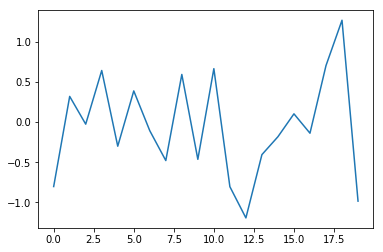

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1000)
y = np.random.standard_normal(20)
print(y)
x = range(len(y))
print(x)
plt.plot(x,y)

### %matplotlib inline

%matplotlib作用

- 在使用jupyter notebook 或者 jupyter qtconsole的时候，才会经常用到%matplotlib，也就是说那一份代码可能就是别人使用jupyter notebook 或者 jupyter qtconsole进行编辑的。

- 而%matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

不带 %matplotlib inline， 则需要 plt.show() 展示图表

In [1]:
# 不带 %matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(1000)
y = np.random.standard_normal(20)
x = range(len(y))
plt.plot(x,y)

plt 会注意到何时传递了 ndarray 对象。在这种情况下，没有必要提供 x 值的 “额外” 信息。如果你只提供 y 值，plot 以索引值作为对应的 x 值。因此，下面一行代码会生成完全一样的输出，如下图

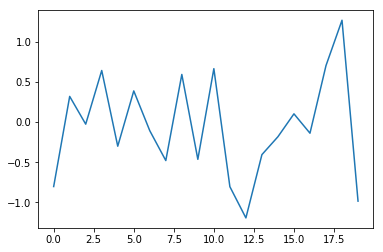

In [7]:
plt.plot(y)

### np.random.seed()

每次运行代码时设置相同的seed，则每次生成的随机数也相同，如果不设置seed，则每次生成的随机数都会不一样

In [2]:
from numpy.random import rand
import numpy as np

# 不使用 seed
a = rand(5)
print('first  time a:{}'.format(a))

a = rand(5)
print('second time a:{}'.format(a))

# 使用 seed 
np.random.seed(3)
b = rand(5)
print('first  time b:{}'.format(b))

np.random.seed(3)
b = rand(5)
print('second time b:{}'.format(b))

first  time a:[0.89629309 0.12558531 0.20724288 0.0514672  0.44080984]
second time a:[0.02987621 0.45683322 0.64914405 0.27848728 0.6762549 ]
first  time b:[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695]
second time b:[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695]


可以简单地向 matplotlib 函数传递 Numpy ndarray 对象。函数能够解释数据结构以简化绘图工作。但是要注意，不要传递太大或者太复杂的数组。

由于大部分 ndarray 方法返回的仍然是一个 ndarray 对象，也可以附加一个方法（有些时候甚至可以附加多个方法）传递对象。我们用样板数据调用 ndarray 对象上的 cumsum 方法，可以获得这些数据的总和，并且和预想的一样得到不同的输出，如下图

[-0.8044583   0.32093155 -0.02548288  0.64432383 -0.30079667  0.38947455
 -0.1074373  -0.47998308  0.5950355  -0.46466753  0.66728131 -0.80611561
 -1.19606983 -0.40596016 -0.18237734  0.10319289 -0.13842199  0.70569237
  1.27179528 -0.98674733]
[-0.8044583  -0.48352676 -0.50900964  0.13531419 -0.16548248  0.22399207
  0.11655477 -0.3634283   0.2316072  -0.23306033  0.43422098 -0.37189463
 -1.56796447 -1.97392463 -2.15630197 -2.05310907 -2.19153106 -1.48583869
 -0.21404341 -1.20079074]


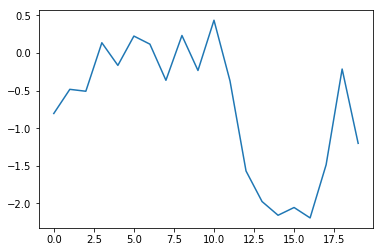

In [24]:
print(y)
print(y.cumsum())
plt.plot(y.cumsum())

### np.cumsum()

函数参数有numpy.cumsum(a,  axis=None, dtype=None, out=None)

(numpy数组,轴参数,输出数组的元素的数据类型，不会用到的参数)

按照所给定的轴参数返回元素的梯形累计和，

- axis=0，按照行累加。
- axis=1，按照列累加。
- axis不给定具体值，就把numpy数组当成一个一维数组。

In [20]:
import numpy as np

a = np.array([[1,2,3],[4,5,6]])
print(a)
print('------axis不给定具体值,numpy数组当成一个一维数组------')
print(np.cumsum(a))
print('[1，1+2=3，1+2+3=6，1+2+3+4=10，1+2+3+4+5=15，1+2+3+4+5+6=21]')
print('------axis=0,按照行累加，行求和------')
print(np.cumsum(a,axis=0))
print('[1, 2, 3]------>     |1     |2     |3    |')
print('[4, 5, 6]------>     |5=1+4 |7=2+5 |9=3+6| ')
print('------axis=1,按照列累加，列求和------')
print(np.cumsum(a,axis=1))
print('[1, 2, 3]------>     |1     |3=2+1  |6=3+2+1 |')
print('[4, 5, 6]------>     |4     |9=4+5  |15=4+5+6| ')

[[1 2 3]
 [4 5 6]]
------axis不给定具体值,numpy数组当成一个一维数组------
[ 1  3  6 10 15 21]
[1，1+2=3，1+2+3=6，1+2+3+4=10，1+2+3+4+5=15，1+2+3+4+5+6=21]
------axis=0,按照行累加，行求和------
[[1 2 3]
 [5 7 9]]
[1, 2, 3]------>     |1     |2     |3    |
[4, 5, 6]------>     |5=1+4 |7=2+5 |9=3+6| 
------axis=1,按照列累加，列求和------
[[ 1  3  6]
 [ 4  9 15]]
[1, 2, 3]------>     |1     |3=2+1  |6=3+2+1 |
[4, 5, 6]------>     |4     |9=4+5  |15=4+5+6| 


### 自定义绘图样式

一般来说，默认绘图样式不能满足报表、出版等的典型要求。例如，你可能希望自定义所使用的字体（例如，为了 LaTeX 字体兼容）、在坐标轴上有标签或者为了更好的可辨认性而绘制网格。因此，matplotlib 提供了大量函数以自定义绘图样式。有些函数容易理解，其他的则需要更深入一步研究。例如，操纵坐标轴和增加网格及标签的函数很容易理解，如下图：

(-0.9500000000000001, 19.95, -2.322818663749045, 0.5655085808655865)

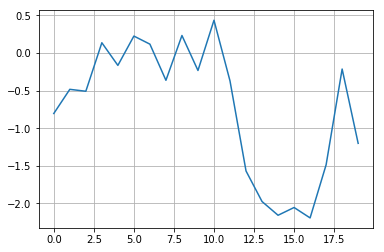

In [25]:
plt.plot(y.cumsum())
plt.grid(True)
plt.axis('tight')

下图列出了 plt.axis 的其它选项，大部分都以字符串对象的形式传递

**plt.axis 选项**

| 参数 | 描述 | 
| - | - | 
| Empty | 返回当前坐标轴限值 |
| off | 关闭坐标轴线和标签 |
| equal | 使用等刻度 |
| scaled | 通过尺寸变化平衡刻度 |
| tight | 使所有数据可见（缩小限值） |
| image | 使所有数据可见（使用数据限值） |
| [xmin,xmax,ymin,ymax] | 将设置限值为给定的（一组）值 |


## 饼图

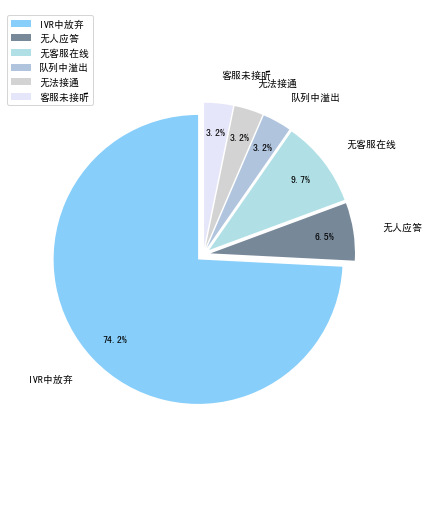

In [1]:
import matplotlib.pyplot as plt

#plt.rcParams['font.sans-serif'] = ['SimHei']# 解决matplotlib中文乱码问题,只在Windows下可以

#调节图形大小，宽，高
plt.figure(figsize=(6,9))

#定义饼状图的标签，标签是列表
labels = ['IVR中放弃','无人应答','无客服在线','队列中溢出','无法接通','客服未接听']

#每个标签占多大，会自动去算百分比
sizes = [23, 2, 3, 1, 1, 1]

#颜色列表
colors = ['lightskyblue','lightslategray','powderblue','lightsteelblue','lightgray','lavender','lavenderblush','lightpink','navajowhite']

explode = (0.05,)*len(labels)
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors[:len(labels)],
                                labeldistance = 1.2,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.8)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
    
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
# loc: 表示legend的位置，包括'upper right','upper left','lower right','lower left'等
# bbox_to_anchor: 表示legend距离图形之间的距离，当出现图形与legend重叠时，可使用bbox_to_anchor进行调整legend的位置
# 由两个参数决定，第一个参数为legend距离左边的距离，第二个参数为距离下面的距离

plt.show()